In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm 
from scipy.io import loadmat
from mpl_toolkits.mplot3d import Axes3D
from time import time

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [2]:
"""Load the datasets."""
images = loadmat('images.mat') 
classes = loadmat('classes')

images=images['images'].T  
classes=classes['classes'].T

In [3]:
#replace images and classes with light_images and light_classes for co
X_train, X_test, y_train, y_test = train_test_split(images, classes, test_size=0.3, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1689, 32256)
(1689, 1)
(725, 32256)
(725, 1)


/opt/homebrew/anaconda3/envs/nml/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Figure size 1000x800 with 0 Axes>

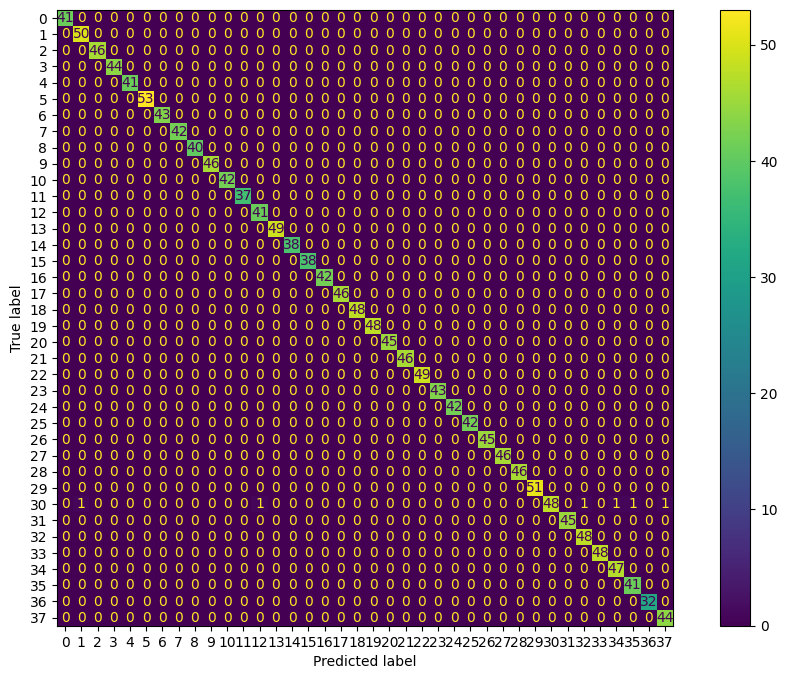

In [4]:
from sklearn.pipeline import Pipeline
from sklearn import decomposition
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

pca = decomposition.PCA(n_components=200, whiten=True)
clf = Pipeline([('pca', pca),
                ('logistic_regression', LogisticRegression(max_iter=1000))])


clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

cm = metrics.confusion_matrix(y_train_pred, y_train)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(10, 8))
disp.plot()
plt.gcf().set_size_inches(12, 8)
plt.show()

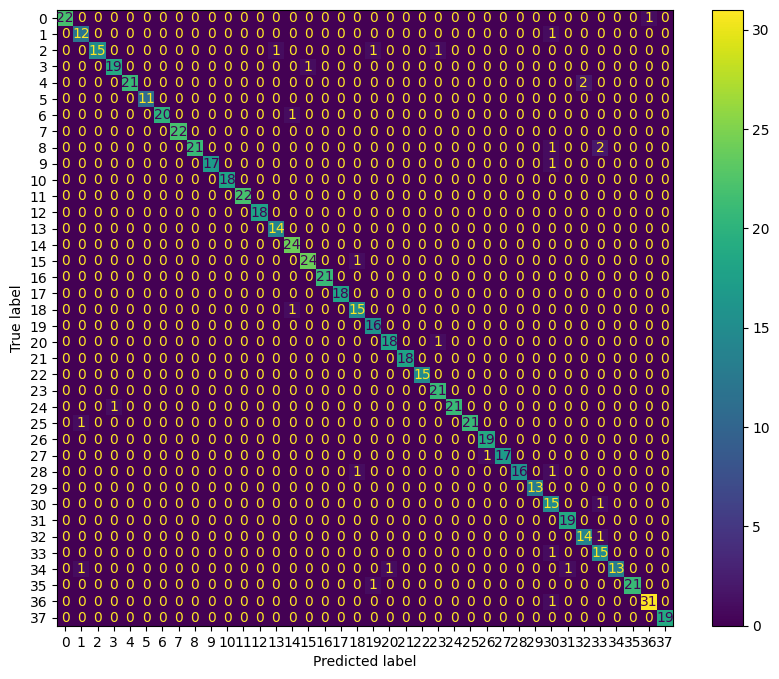

In [5]:
cm = metrics.confusion_matrix(y_test, y_test_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.gcf().set_size_inches(10, 8)
plt.show()

In [6]:
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       1.00      0.96      0.98        23
           2       0.86      0.92      0.89        13
           3       1.00      0.83      0.91        18
           4       0.95      0.95      0.95        20
           5       1.00      0.91      0.95        23
           6       1.00      1.00      1.00        11
           7       1.00      0.95      0.98        21
           8       1.00      1.00      1.00        22
           9       1.00      0.88      0.93        24
          10       1.00      0.94      0.97        18
          11       1.00      1.00      1.00        18
          12       1.00      1.00      1.00        22
          13       1.00      1.00      1.00        18
          14       0.93      1.00      0.97        14
          15       0.92      1.00      0.96        24
          16       0.96      0.96      0.96        25
          17       1.00      1.00      1.00        21
          18       1.00    

In [ ]:
from torchvision.models import resnet50, ResNet50_Weights
from torchvision import transforms

weights = ResNet50_Weights.IMAGENET1K_V2
feature_extractor = resnet50(weights=weights)

In [ ]:
from PIL import Image
import torch

preprocess = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # Convert grayscale to RGB
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.ToTensor(),         # Convert images to tensors
    weights.transforms()
])

reshaped_images = images.reshape(-1, 168, 192)  # Reshape flattened images to (168, 192)
pil_images = [Image.fromarray(img.astype(np.uint8)) for img in reshaped_images]

# Preprocess the images and stack them into a batch
input_tensors = torch.stack([preprocess(img) for img in pil_images])

with torch.no_grad():
    features = feature_extractor(input_tensors)

print("Extracted features shape:", features.shape)

Extracted features shape: torch.Size([2414, 1000])


<Figure size 1000x800 with 0 Axes>

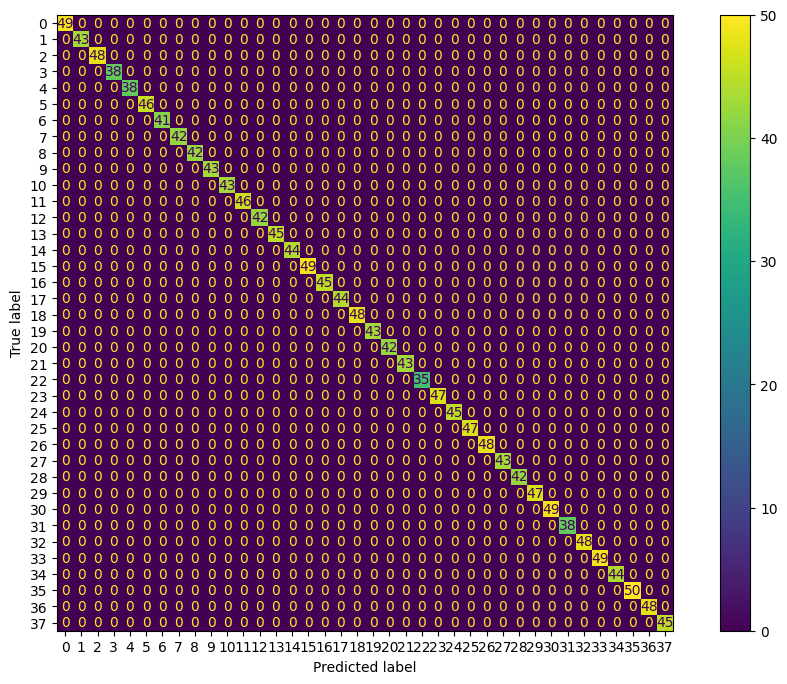

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features.reshape(features.shape[0], -1), classes, test_size=0.3, random_state=42)

# Initialize and train the logistic regression model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train.ravel())  # Use ravel() to flatten the labels if needed

# Make predictions
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
cm = metrics.confusion_matrix(y_train_pred, y_train)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(10, 8))
disp.plot()
plt.gcf().set_size_inches(12, 8)
plt.show()

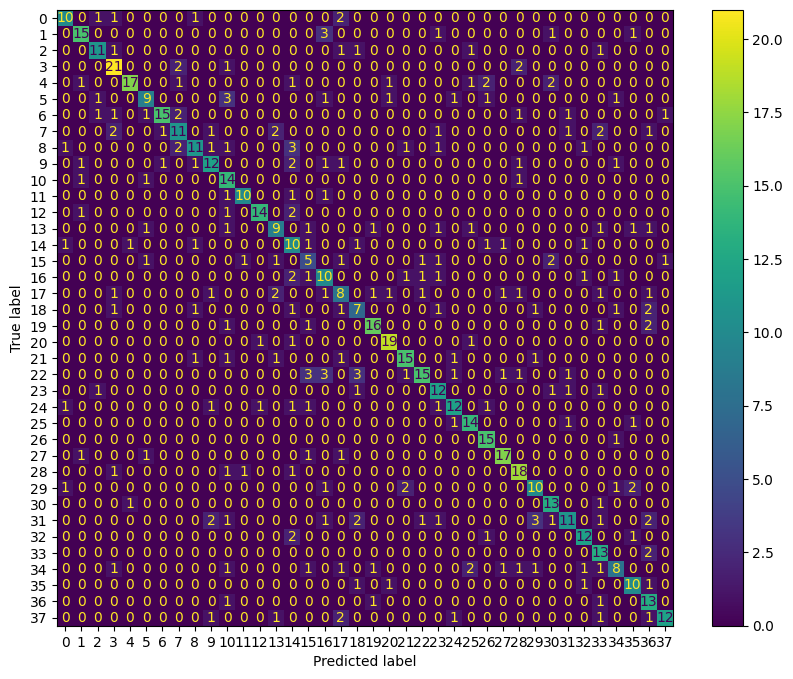

In [ ]:
cm = metrics.confusion_matrix(y_test, y_test_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.gcf().set_size_inches(10, 8)
plt.show()

In [ ]:
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       0.71      0.67      0.69        15
           2       0.75      0.71      0.73        21
           3       0.73      0.69      0.71        16
           4       0.70      0.81      0.75        26
           5       0.89      0.65      0.76        26
           6       0.64      0.50      0.56        18
           7       0.88      0.65      0.75        23
           8       0.61      0.50      0.55        22
           9       0.69      0.50      0.58        22
          10       0.63      0.57      0.60        21
          11       0.50      0.82      0.62        17
          12       0.83      0.77      0.80        13
          13       0.88      0.78      0.82        18
          14       0.56      0.50      0.53        18
          15       0.37      0.56      0.44        18
          16       0.33      0.36      0.34        14
          17       0.45      0.56      0.50        18
          18       0.42    